In [1]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
# import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [44]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892
5,5,3.0,56643
6,6,3.1,60151
7,7,3.3,54446
8,8,3.3,64446
9,9,3.8,57190


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [20]:
# Dependent variable is salary  and independent is experience
y = df['Salary']

In [21]:
y

0      39344
1      46206
2      37732
3      43526
4      39892
5      56643
6      60151
7      54446
8      64446
9      57190
10     63219
11     55795
12     56958
13     57082
14     61112
15     67939
16     66030
17     83089
18     81364
19     93941
20     91739
21     98274
22    101303
23    113813
24    109432
25    105583
26    116970
27    112636
28    122392
29    121873
Name: Salary, dtype: int64

In [22]:
x = df['YearsExperience']
x

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

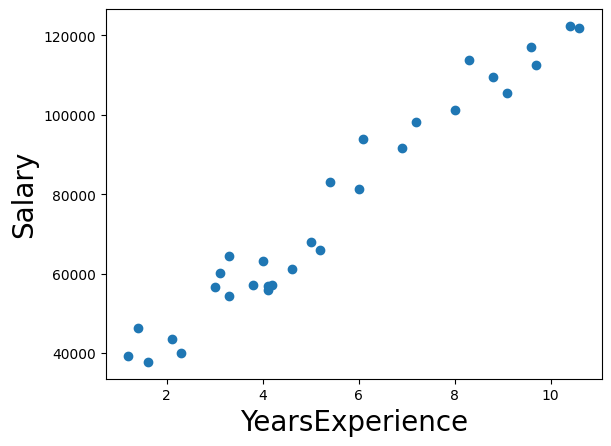

In [25]:
plt.scatter(x,y)
 
plt.xlabel('YearsExperience', fontsize = 20)
 
plt.ylabel('Salary', fontsize = 20)
 
plt.show()

In [27]:
x = df['YearsExperience'].values
y = df['Salary'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR




In [46]:
# initialize our Linear Regression model
regressor=LinearRegression()

In [31]:
X_train.shape

(24,)

In [34]:
x_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [35]:
regressor.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9024461774180498


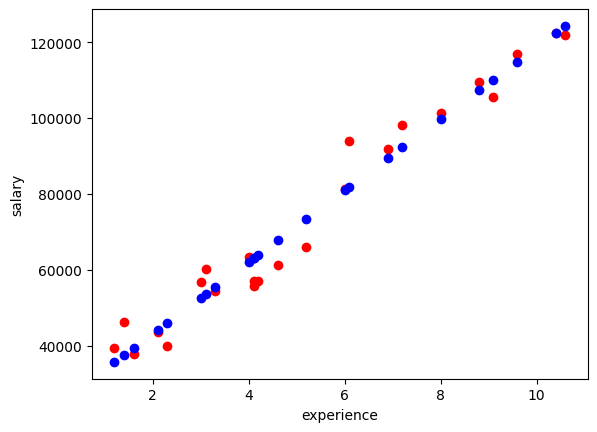

In [38]:
# Visualising the Result (Training_Set)
plt.scatter(x_train,y_train, color= 'red')
plt.scatter(x_train, regressor.predict(x_train), color= 'blue' )
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [43]:
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Squared Error: 49830096.855908364
Root Mean Squared Error: 7059.043621901508


In [47]:
regressor_dt=DecisionTreeRegressor(random_state=0)

In [48]:
regressor_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
y_pred_dt = regressor_dt.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9024461774180498


In [62]:
X_test = X_test.ravel()

array([9.7, 5. , 8.3, 5.4, 3.3, 3.8])

In [66]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
y_train = y_train.ravel()
rf_regressor.fit(x_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = metrics.mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Mean Squared Error: {rf_mse}")

Random Forest Regressor Mean Squared Error: 63721129.712950476
